In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

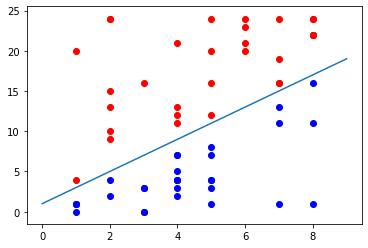

In [2]:
#Generar datos y graficar
num_points = 30
m, b = 2, 1
lower, upper = 0, 25

x1 = [random.randrange(start=1, stop=9) for i in range(num_points)]
x2 = [random.randrange(start=1, stop=9) for i in range(num_points)]

y1 = [random.randrange(start=lower, stop=m*x+b) for x in x1]
y2 = [random.randrange(start=m*x+b+1, stop=upper) for x in x2]

plt.plot(np.arange(10), m*np.arange(10)+b)
plt.scatter(x1, y1, c='blue')
plt.scatter(x2, y2, c='red')


In [3]:
#Juntamos los datos generados con su respectiva etiqueta
df = pd.DataFrame(list(zip(x1, y1)), 
               columns =['X', 'Y'])
df2 = pd.DataFrame(list(zip(x2, y2)), 
               columns =['X', 'Y'])
df['L'] = 1
df2['L'] = 0
frames = [df, df2]
result = pd.concat(frames, ignore_index=True)
data = np.asmatrix(result, dtype = 'float64')

Iteraction  1 - w:  [[ -0.97732114  -3.69250745 -10.31407355]]
Iteraction  1 - m:  -0.35800670129624523
Iteraction  1 - misclassified:  1
Iteraction  1 - ecm:  1.0
Iteraction  1 - acurracy:  0.9833333333333333
-----------------------------------------------------
Iteraction  2 - w:  [[  0.02267886  -0.69250745 -11.31407355]]
Iteraction  2 - m:  -0.06120761423193476
Iteraction  2 - misclassified:  3
Iteraction  2 - ecm:  2.0
Iteraction  2 - acurracy:  0.95
-----------------------------------------------------
Iteraction  3 - w:  [[  1.02267886   2.30749255 -12.31407355]]
Iteraction  3 - m:  0.1873866142526137
Iteraction  3 - misclassified:  3
Iteraction  3 - ecm:  2.3333333333333335
Iteraction  3 - acurracy:  0.95
-----------------------------------------------------
Iteraction  4 - w:  [[  2.02267886   5.30749255 -13.31407355]]
Iteraction  4 - m:  0.39863776700480524
Iteraction  4 - misclassified:  3
Iteraction  4 - ecm:  2.5
Iteraction  4 - acurracy:  0.95
----------------------------

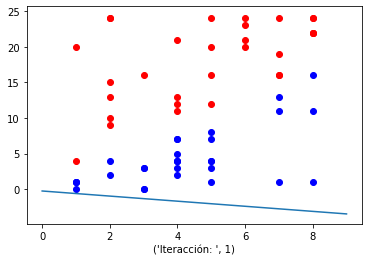

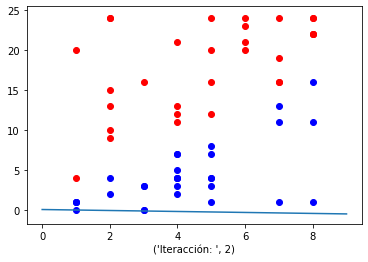

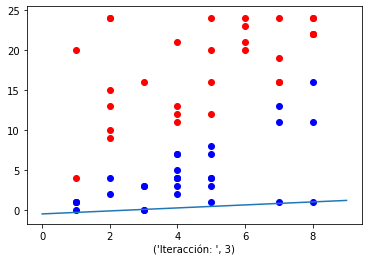

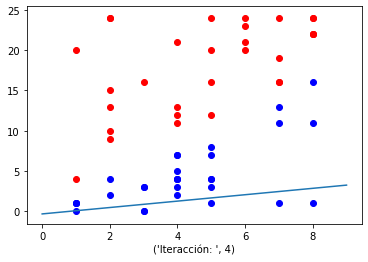

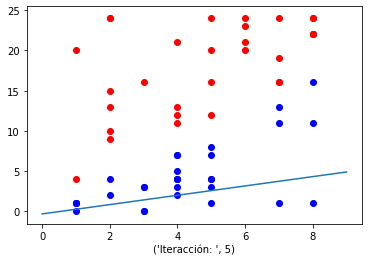

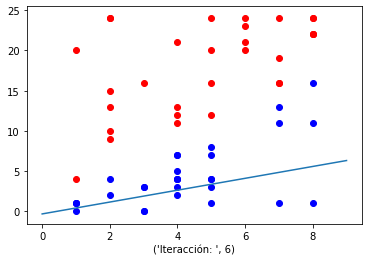

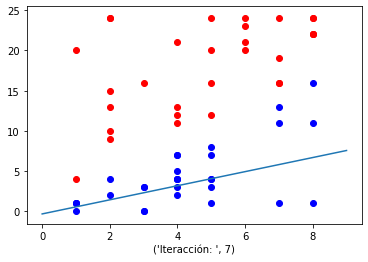

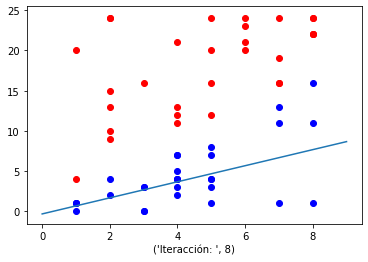

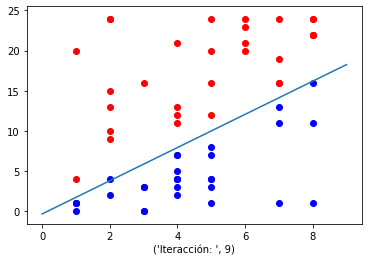

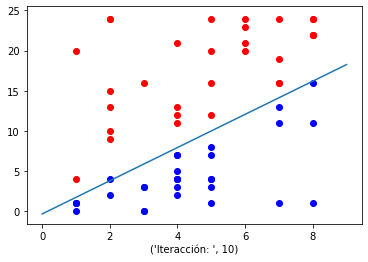

In [5]:
def perceptron(data, num_iter):
    features = data[:, :-1] #las x's y y's
    labels = data[:, -1] #el último elemento es el clasificatorio
    
    # inicializar los w en 0's, agregamos un elemento por el bias
    w = np.zeros(shape=(1, features.shape[1]+1))
    w = np.random.rand(1,3)
    misclassified_ = []
    rate_classified_ = []
    count = 0
    acurracy = 0
    iteractions = 0
    deltas = 0
    #for epoch in range(num_iter):
    while acurracy < 1:
        misclassified = 0
        count = 0
        iteractions = iteractions +1 
        for x, label in zip(features, labels):
            count = count+1
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            delta = (label.item(0,0) - target)
            
            deltas += pow(delta,2)
            
            if(delta): # mal clasificado
                misclassified += 1
                w += (delta * x )
        rate_classified_.append(1-(misclassified/count))
        misclassified_.append(misclassified)
        acurracy = 1-(misclassified/count)
        
        b = w[0][0]
        w1 = w[0][1]
        w2 = w[0][2]
        
        
        py1 = 0
        px1 = -b / w1 if w1 != 0 else 0
        px2 = 0
        py2 = -b / w2 if w1 != 0 else 0
        #if((w1 != 0) & (w2 != 0) & ((b / w1) != 0)):
        m = -(b / w2) / (b / w1) 
        slope = m

        point_1 = (0, -b / w2) 
        point_2 = (-b / w1, 0)
        slope = -(b / w2) / (b / w1)
        
        M = -w1 / w2
        C = -b / w1
        
        plt.figure()
        #p = ((-(b / w2) / (b / w1)) * np.arange(10)) + (-b / w2)
        #print(p)
        #p = sgn(w1*x+w2*y+w3
        #if((w1 != 0) & (w2 != 0) & ((b / w1) != 0)):
        #plt.plot(np.arange(10),((-(b / w2) / (b / w1))* np.arange(10) + (-b / w2)))
        #plt.plot(np.arange(10),  p ) 
        plt.plot(np.arange(10), M * np.arange(10) + C)
        
        
        #w=features[0][0]
        #xx=np.linspace(0, 10)
        #yy=-(w[0]*xx+per.intercept_[0])/w[0][1]
        #plot the line
        #plt.plot(xx, yy, 'k-', label='$hyperplane$')

        
        
        plt.scatter(x1, y1, c='blue')
        plt.scatter(x2, y2, c='red')
        plt.xlabel(('Iteracción: ', iteractions))
        
        print('Iteraction ', iteractions, '- w: ',  w)
        print('Iteraction ', iteractions, '- m: ',  m)
        print('Iteraction ', iteractions, '- misclassified: ',misclassified)        
        print('Iteraction ', iteractions, '- ecm: ',deltas/iteractions)
        print('Iteraction ', iteractions, '- acurracy: ', acurracy)
        print('-----------------------------------------------------')
        
    plt.show()
    return (w, misclassified_, rate_classified_, iteractions, deltas/iteractions)
             
num_iter = 20
w, misclassified_, rate_classified_,iteractions_,ecm_ = perceptron(data, num_iter)




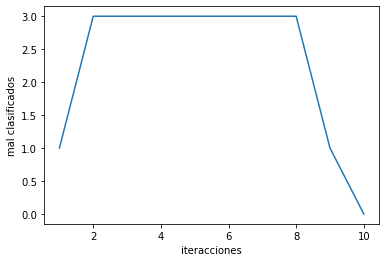

[0.9833333333333333, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.9833333333333333, 1.0]
[[  7.02267886  21.30749255 -10.31407355]]


In [6]:
epochs = np.arange(1, iteractions_+1)
plt.figure()
plt.plot(epochs, misclassified_)
plt.xlabel('iteracciones')
plt.ylabel('mal clasificados')
plt.show()
print(rate_classified_)
print(w)

In [8]:
b = w[0][0]
w1 = w[0][1]
w2 = w[0][2]


py1 = 0
px1 = -b / w1 if w1 != 0 else 0
px2 = 0
py2 = -b / w2 if w1 != 0 else 0
if((w1 != 0) & (w2 != 0) & ((b / w1) != 0)):
    m = -(b / w2) / (b / w1) 
x = 8
y = ((-(b / w2) / (b / w1))* x + (-b / w2))
print(m,x,y)

print(b,w1,w2)

X = np.arange(10)
M = -w1 / w2
C = -b / w1
print(M,C)



2.0658658717730773 8 17.20781012091413
7.022678855878487 21.307492550620086 -10.314073552283642
2.0658658717730773 -0.32958729607412746
